# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

while len(cities) < 500:
    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
print("Beginning Data Retrieval\n-----------------------------\n")

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

responses = []

i = 0
for city in cities:
    i = i + 1
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        print(f"Processing Record {i} | {city}")
        responses.append(response)
    else:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------

City not found. Skipping...
Processing Record 2 | pangnirtung
Processing Record 3 | hithadhoo
Processing Record 4 | luderitz
Processing Record 5 | mataura
Processing Record 6 | helong
Processing Record 7 | tasiilaq
Processing Record 8 | havre-saint-pierre
Processing Record 9 | rikitea
Processing Record 10 | makakilo city
Processing Record 11 | half moon bay
Processing Record 12 | jimma
Processing Record 13 | georgetown
Processing Record 14 | dunedin
Processing Record 15 | iturama
Processing Record 16 | avarua
Processing Record 17 | kodiak
Processing Record 18 | tuktoyaktuk
Processing Record 19 | korem
Processing Record 20 | vila velha
Processing Record 21 | manyana
Processing Record 22 | rocha
Processing Record 23 | butaritari
Processing Record 24 | hobart
Processing Record 25 | rantepao
City not found. Skipping...
Processing Record 27 | crowley
Processing Record 28 | phan thiet
Processing Record 29 | hermanus
Processing Record 30

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

for resp in responses:
    city_list.append(resp['name'])
    cloudiness_list.append(resp['clouds']['all'])
    country_list.append(resp['sys']['country'])
    date_list.append(resp['dt'])
    humidity_list.append(resp['main']['humidity'])
    lat_list.append(resp['coord']['lat'])
    lng_list.append(resp['coord']['lon'])
    max_temp_list.append(resp['main']['temp_max'])
    wind_speed_list.append(resp['wind']['speed'])
    
city_data_dict = {
    'City': city_list,
    'Cloudiness': cloudiness_list,
    'Country': country_list,
    'Date': date_list,
    'Humidity': humidity_list,
    'Lat': lat_list,
    'Lng': lng_list,
    'Max Temp': max_temp_list,
    'Wind Speed': wind_speed_list
}

city_data_df = pd.DataFrame(city_data_dict)

city_data_df.to_csv(output_data_file, index=False)

city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pangnirtung,100,CA,1578395286,99,66.15,-65.72,-40.79,5.95
1,Hithadhoo,100,MV,1578395286,76,-0.60,73.08,84.25,16.44
2,Luderitz,0,NA,1578395286,44,-26.65,15.16,80.60,13.87
3,Mataura,78,NZ,1578395286,78,-46.19,168.86,48.99,5.99
4,Helong,15,CN,1578395286,73,25.94,116.13,55.85,4.94


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

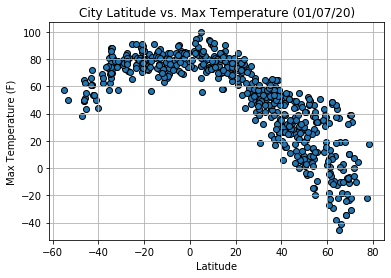

In [5]:
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title('City Latitude vs. Max Temperature (01/07/20)')
plt.savefig('output_data/CityLatitudeVsMaxTemp.png')

In [6]:
# This plot shows that the temperature is typically higher in the Southern Hemisphere, particularly as we approach just below the equator (latitude 0). This makes sense since it is Summer in the Southern Hemisphere and Winter in the Northern Hemisphere in January.

#### Latitude vs. Humidity Plot

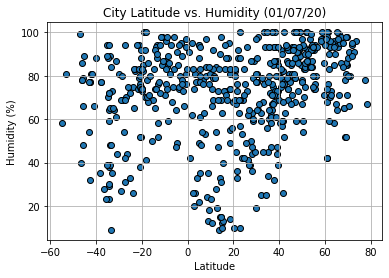

In [7]:
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs. Humidity (01/07/20)')
plt.savefig('output_data/CityLatitudeVsHumidity.png')

In [8]:
# This shows that the humidity is dropping slightly lower in the Southern Hemisphere right now.

#### Latitude vs. Cloudiness Plot

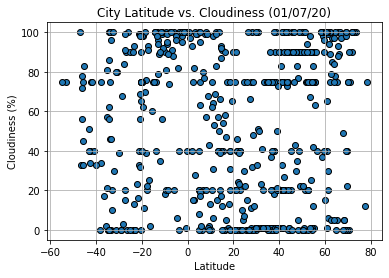

In [9]:
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs. Cloudiness (01/07/20)')
plt.savefig('output_data/CityLatitudeVsCloudiness.png')

In [10]:
# This shows that the cloudiness may be slightly lower in the Northern Hemisphere. It does not seem to be incredibly lower, however.

#### Latitude vs. Wind Speed Plot

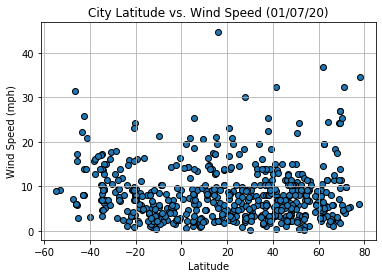

In [11]:
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs. Wind Speed (01/07/20)')
plt.savefig('output_data/CityLatitudeVsWindSpeed.png')

In [12]:
# This shows that the wind speed is somewhat higher near the lowest and highest latitudes (further away from the equator).

## Linear Regression

In [13]:
def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] > 0, :]
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8640357660220557


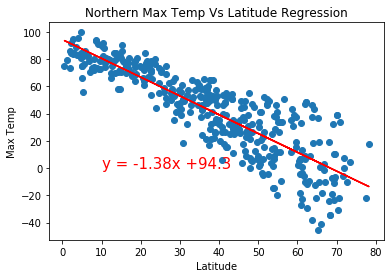

In [15]:
linear_reg_plot(northern_hemisphere_df, 'Northern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'output_data/NorthernMaxTempVsLatitudeReg.png', (10,0))

In [16]:
# This linear regression shows that the Max Temperature generally decreases as the latitude goes further away from the equator, which supports our hypothesis for the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5517610507932597


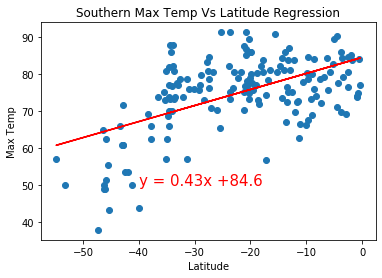

In [17]:
linear_reg_plot(southern_hemisphere_df, 'Southern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'output_data/SouthernMaxTempVsLatitudeReg.png', (-40,50))

In [18]:
# This linear regression shows that the Max Temperature generally decreases as the latitude goes further away from the equator, which supports our hypothesis for the Southern Hemisphere. However, the r-squared is not extremely strong for this data set.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4363525449742422


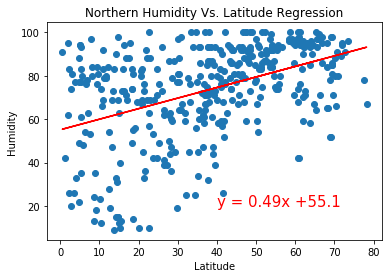

In [19]:
linear_reg_plot(northern_hemisphere_df, 'Northern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'output_data/NorthernHumidityVsLatitudeReg.png', (40,20))

In [20]:
# This linear regression shows that the humidity percent generally decreases as the latitude goes further away from the equator, but the r-squared is not very high for this making it difficult to determine if the data accurately portrays this or not.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3269718425569661


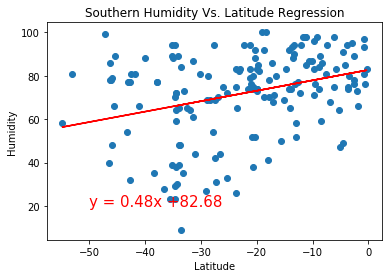

In [21]:
linear_reg_plot(southern_hemisphere_df, 'Southern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'output_data/SouthernHumidityVsLatitudeReg.png', (-50,20))

In [22]:
# This linear regression suggests that the humidity percent increases as we get closer to the equator, but this is probably not exactly the case since the r-squared is not strong.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20955242695494583


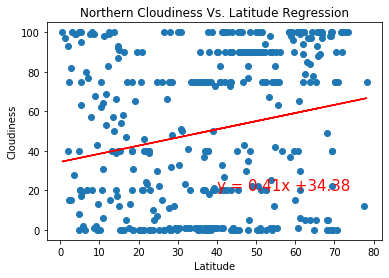

In [23]:
linear_reg_plot(northern_hemisphere_df, 'Northern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'output_data/NorthernCloudinessVsLatitudeReg.png', (40,20))

In [24]:
# This linear regression suggests that the cloudiness percent increases as we get further from the equator, but this is probably not exactly the case since the r-squared is not strong.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3120107161765477


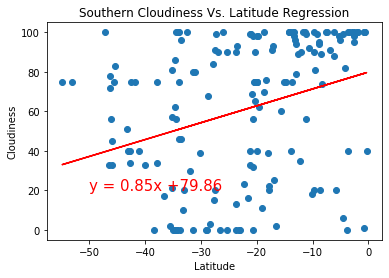

In [25]:
linear_reg_plot(southern_hemisphere_df, 'Southern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'output_data/SouthernCloudinessVsLatitudeReg.png', (-50,20))

In [26]:
# This linear regression suggests that the cloudiness percent decreases as we get further from the equator, but this is probably not exactly the case since the r-squared is not strong.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0245422860452587


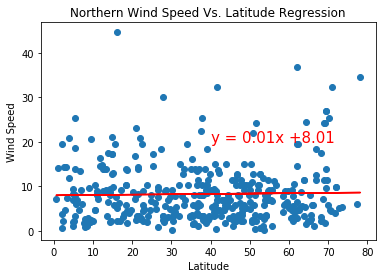

In [27]:
linear_reg_plot(northern_hemisphere_df, 'Northern Wind Speed Vs. Latitude Regression', 'Wind Speed', 'Wind Speed', 'output_data/NorthernWindSpeedVsLatitudeReg.png', (40,20))

In [28]:
# This linear regression suggests that the wind speed slightly increases as we get further from the equator, but this is likely not exactly the case since the r-squared is not strong.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.399497524557798


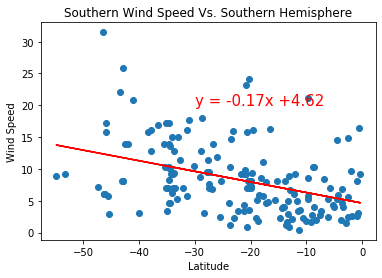

In [29]:
linear_reg_plot(southern_hemisphere_df, 'Southern Wind Speed Vs. Southern Hemisphere', 'Wind Speed', 'Wind Speed', 'output_data/SouthernWindSpeedVsLatitudeReg.png', (-30,20))

In [30]:
# This linear regression suggests that the wind speed slightly increases as we get further from the equator, but this is likely not exactly the case since the r-squared is not strong.